In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [5]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
sub = pd.read_csv("./sample_submission.csv")


In [6]:
print('학습용 데이터 : ', train.shape)
print('테스트용 데이터 : ', test.shape)

학습용 데이터 :  (26049, 16)
테스트용 데이터 :  (6512, 15)


In [7]:
## 데이터 합치기
###
y = train['income']
test['income'] = 'blank'

In [8]:
train.shape, test.shape

((26049, 16), (6512, 16))

In [9]:
all_dat = pd.concat([train, test], axis=0) # 행으로 붙이기
print(all_dat.shape)

(32561, 16)


In [10]:
all_dat.income.value_counts()

<=50K    19744
blank     6512
>50K      6305
Name: income, dtype: int64

<AxesSubplot:xlabel='income', ylabel='count'>

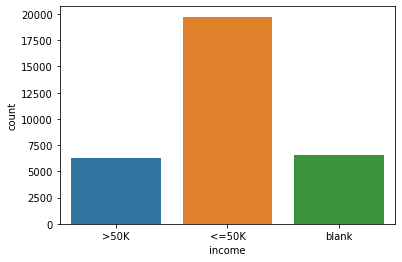

In [11]:
sns.countplot(x='income', data=all_dat)

In [12]:
## 데이터 전처리
## all_dat.loc[행조건, 열조건]
all_dat.loc[all_dat['income']=='>50K', 'target']=1
all_dat.loc[all_dat['income']=='<=50K', 'target'] =0
all_dat.loc[all_dat['income']=='blank','target']=999
all_dat['target'] = all_dat['target'].astype('int')

In [13]:
all_dat.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,target
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K,1
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K,0
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K,0
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K,0
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K,0


In [14]:
sel_cat = ['workclass', 'education', 'marital_status',
           'occupation', 'relationship', 'race', 
           'sex', 'native_country' ]

X_cat = all_dat[sel_cat]
y = all_dat['target']

In [15]:
X_dummy = pd.get_dummies(X_cat)
X_dummy

,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6507,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6508,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6509,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6510,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
all_dat_n = pd.concat([all_dat, X_dummy], axis=1)
all_dat_n

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,...,0,0,0,0,0,0,0,1,0,0
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,...,0,0,0,0,0,0,0,1,0,0
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,...,0,0,0,0,0,0,0,1,0,0
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,...,0,0,0,0,0,0,0,1,0,0
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6507,6507,35,Private,61343,Bachelors,13,Married-civ-spouse,Sales,Husband,White,...,0,0,0,0,0,0,0,1,0,0
6508,6508,41,Self-emp-inc,32185,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,...,0,0,0,0,0,0,0,1,0,0
6509,6509,39,Private,409189,5th-6th,3,Married-civ-spouse,Other-service,Husband,White,...,0,0,0,0,0,0,0,0,0,0
6510,6510,35,Private,180342,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,...,0,0,0,0,0,0,0,1,0,0


In [17]:
sel_cat = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
           'race', 'sex', 'native_country', 'income']

all_dat_n = all_dat_n.drop(sel_cat, axis=1)

In [18]:
train_n = all_dat_n.loc[ (all_dat_n['target'] == 0) | 
                        (all_dat_n['target'] == 1), :]
test_n = all_dat_n.loc[ all_dat_n['target']==999, :  ]

In [19]:
X = train_n.drop(['target'],axis=1)
y = train_n['target']
test_X = test_n.drop(['target'],axis=1)

In [20]:
print(X.shape, y.shape, test_X.shape)

(26049, 109) (26049,) (6512, 109)


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [22]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print('학습용 데이터 점수 : ',model.score(X_train, y_train))
print('테스트용 데이터 점수 : ',model.score(X_test, y_test))
print('f1점수 :', f1_score(y_test,pred))

학습용 데이터 점수 :  1.0
테스트용 데이터 점수 :  0.8616612927990174
f1점수 : 0.6846342317115856


In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

import numpy as np
import time

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

sel = ['age', 'fnlwgt', 'capital_gain']

X_tr_all = X[sel]
y_tr_all = y
X_test_all = test_X[sel]

X_train, X_test, y_train, y_test = train_test_split(X_tr_all, 
                                                    y_tr_all,
                                                    test_size=0.3,
                                                    random_state=77)

In [25]:
model_list = ["RandomForestRegressor",  "GradientBoostingClassifier", "LogisticRegression"]
model_score = []
model_time = []

In [26]:
now_time = time.time()

model = RandomForestRegressor(random_state=30)
model.fit(X_train, y_train)
score = cross_val_score(model, X_train, y_train, cv=5, scoring="roc_auc")
print(score)

pro_time = time.time() - now_time

print("걸린 시간 :", pro_time)  # 걸린 시간
print("RandomForestRegressor Score : {}".format(np.mean( score ) ))

[0.7204471  0.73955972 0.73611203 0.72815306 0.71192845]
걸린 시간 : 9.381168127059937
RandomForestRegressor Score : 0.7272400712073421


In [27]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print('학습용 데이터 점수 : ',model.score(X_train, y_train))
print('테스트용 데이터 점수 : ',model.score(X_test, y_test))
print('f1점수 :', f1_score(y_test,pred))

학습용 데이터 점수 :  0.9838762750904902
테스트용 데이터 점수 :  0.7293666026871402
f1점수 : 0.4403281291346917


In [28]:
import xgboost as xgb
import lightgbm as lgbm

print(xgb.__version__)
print(lgbm.__version__)

1.6.1
3.3.2


In [29]:
now_time = time.time # 현재 시간
model = xgb.XGBRegressor(objestive ='reg:logistic', n_estimators=100)
model.fit(X_train, y_train)

score = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')

pro_time = time.time() - now_time
print('최종 평가점수(ROC_AUC)', np.mean(score))

[19:05:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "objestive" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:05:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "objestive" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:05:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "objestive" } might not be used.

  This could b

TypeError: unsupported operand type(s) for -: 'float' and 'builtin_function_or_method'

In [ ]:
now_time = time.time()  # 현재 시간

model = xgb.XGBRegressor(objective="reg:logistic",
            n_estimators=500,
            colsample_bytree = 0.4, # 각나무마다 사용하는 feature 비율
            learning_rate = 0.1,
            max_depth = 5, 
            alpha = 0.1)

model.fit(X_train, y_train)  # 학습

score = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')

pro_time = time.time() - now_time

print("최종 평가 점수(ROC_AUC)", np.mean(score))